In this example we will see how to create ndvi from landsat 8 bands(you can easily create other indices too just by changinge the required bands)

In [28]:
#import the library (Assuming the library is already installed )
import rasterio
import numpy as np
from rasterio.enums import Resampling
from rasterio.plot import show
import matplotlib.pyplot as plt

In [29]:
#True color composite using b2(blue),b3(green),b4(red) of landsat 8,you can choose your required band accordingly
red_band_path = '/content/input_raster/b4_norm.tif'
nir_band_path = '/content/input_raster/b5_norm.tif'

In [30]:
# Function to read a band and handle nodata values
def read_band(file_path):
    with rasterio.open(file_path) as src:
        band = src.read(1).astype('float64')  # Use float64 for initial read
        nodata = src.nodata
        if nodata is not None:
            band[band == nodata] = np.nan
        return band, src.meta


In [31]:
# Read the NIR and Red bands
nir, nir_meta = read_band(nir_band_path)
red, red_meta = read_band(red_band_path)

# Check the range of values and presence of nodata
print(f"NIR range: {nir.min()} to {nir.max()}")
print(f"Red range: {red.min()} to {red.max()}")
print(f"NIR has {np.isnan(nir).sum()} nodata values")
print(f"Red has {np.isnan(red).sum()} nodata values")



NIR range: -0.14660731054710938 to 1.4186016583159395
Red range: -0.14660731054710938 to 1.2845439335516629
NIR has 0 nodata values
Red has 0 nodata values


In [35]:
# Normalize values if necessary (assuming values are not in 0-1 range)
if nir.max() > 1 or red.max() > 1:
    nir = nir / nir.max()
    red = red / red.max()

# Clip values to prevent overflow
nir = np.clip(nir, 0, 1)
red = np.clip(red, 0, 1)

# Avoid division by zero and invalid values
np.seterr(divide='ignore', invalid='ignore')


print(f"NIR range: {nir.min()} to {nir.max()}")
print(f"Red range: {red.min()} to {red.max()}")
print(f"NIR has {np.isnan(nir).sum()} nodata values")
print(f"Red has {np.isnan(red).sum()} nodata values")


NIR range: 0.0 to 1.0
Red range: 0.0 to 1.0
NIR has 0 nodata values
Red has 0 nodata values


In [27]:
output_path = '/content/output_raster/rgb_composite.tif'
# Update meta to reflect the number of layers
meta.update(count=rgb_composite.shape[2])

with rasterio.open(output_path, 'w', **meta) as dst:
    for i in range(rgb_composite.shape[2]):
        dst.write(rgb_composite[:, :, i], i + 1)


In [36]:
# Calculate NDVI
ndvi = (nir - red) / (nir + red)

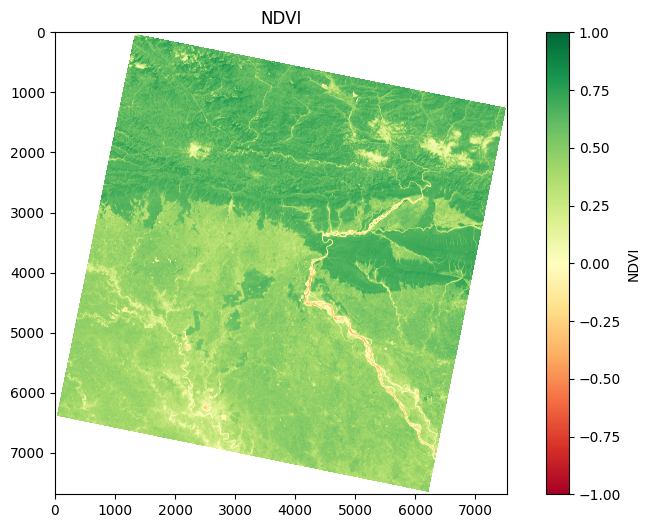

In [37]:
# Display the NDVI
plt.figure(figsize=(10, 6))
plt.imshow(ndvi, cmap='RdYlGn')
plt.colorbar(label='NDVI')
plt.title('NDVI')
plt.savefig('NDVI')
plt.show()

In [39]:
ndvi_output_path = '/content/output_raster/ndvi.tif'
# Update the metadata for the NDVI output file
ndvi_meta = nir_meta.copy()
ndvi_meta.update({
    'dtype': 'float32',
    'count': 1,
    'nodata': np.nan  # Set nodata to a valid value for float32
})
# Write the NDVI to a new GeoTIFF file
with rasterio.open(ndvi_output_path, 'w', **ndvi_meta) as dst:
    dst.write(ndvi.astype('float32'), 1)
